In [108]:
import scipy

def negative_binomial(k, n, p):
    """Probability of the n-th success on the k-th Bernoulli trial.

    Args:
        k (int): total number of trials
        n (int): number of successes
        p (float): probability of success

    Returns:
        (float): probability of the n-th success occurring on the k-th trial
    """
    assert n >= 1, "n must be a positive integer"
    assert type(n) == int, "n must a positive integer"
    assert k >= 0, "k must be an integer greater than or equal to zero"
    assert type(n) == int, "k must be an integer greater than or equal to zero"
    assert 0 < p <= 1, "p must be greater than 0 and less than or equal to 1"
    return scipy.special.comb( k-1, n-1, exact=True ) * p**n * (1-p)**(k-n)

def find_min_k(n, p, c):
    """Minimum number of Bernoulli trials required to expect at least n successes with at least probability c"
    
    Args:
        n (int): desired number of successes
        p (float): independent probability of success for each trial
        c (float): desired probability of at least n successes


    Returns:
        (int): minimum number of trials (k) needed
        (float): probability of at least n successes after k trials
    """
    assert n >= 1, "n must be a positive integer"
    assert type(n) == int, "n must a positive integer"
    assert 0 < p <= 1, "p must be greater than 0 and less than or equal to 1"
    assert 0 < c < 1, "c must be betweeen 0 and 1"
    prob_of_n_successes = 0.0
    k = n
    while prob_of_n_successes < c:
      x = negative_binomial(k, n, p)
      prob_of_n_successes += negative_binomial(k, n, p) 
      if prob_of_n_successes >= c:
            return k, prob_of_n_successes
      k+=1

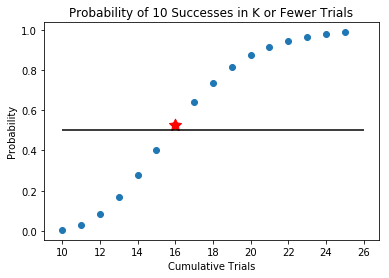

In [120]:
import matplotlib.pyplot as plt

c = 0.5
p = 0.6
n = 10

k, pstar = find_min_k(n,p,c)

n_tries = [ i for i in range(n,k+10) ]
prob_of_n_tries = list(map( negative_binomial, n_tries, [n]*len(n_tries), [p]*len(n_tries) ))
plt.hlines(c, n, k+10)
plt.scatter( n_tries, scipy.cumsum(prob_of_n_tries) )
plt.scatter( k, pstar, facecolor='red', marker=(5, 1), s=160)
plt.title("Probability of " + str(n)  + " Successes in K or Fewer Trials")
plt.xlabel("Cumulative Trials")
plt.ylabel("Probability")
plt.show()
